In the column "Name" of HMXB_cat_Neumann catalog, on row 175 to 192 of kim_persistent, i have elements i want to split by simple spaces, but the names are in the second column once split the columns. In third place, in kim_transient between 304 and 367 i do have names in the "Names" column. Also, in malacaria_persistent and malacaria_transient the names of the objects are in the column named "Sources", while in the v2023-09-Fortin catalog the names are in "Main_ID" column. This is useful to know whether all the objects are in the four catalogs. 

In [1]:
%matplotlib widget

C:\Users\Acer\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### kim_transient Catalog with it's names (Here the Kim catalog is divided in two: transient and persistent, as malacaria catalog is).

In [2]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image, display
from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimg
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import seaborn as sns


nombre_excel = "HMXB_catalogs.xlsx"

kim_transient = pd.read_excel(nombre_excel, sheet_name="kim_transient")
columna_kim_t = kim_transient.iloc[302:367, 0]
df_kim_t = columna_kim_t.str.split(expand=True)
nombres_kim_t = df_kim_t[1] + " " + df_kim_t[2]

### Kim_persistent Catalog with it's names.

In [3]:
kim_persistent = pd.read_excel(nombre_excel, sheet_name="kim_persistent")
columna_kim_p = kim_persistent.iloc[173:192, 0]
df_kim_p = columna_kim_p.str.split(expand=True)
nombres_kim_p = df_kim_p[1] + " " + df_kim_p[2]

### HMXB_cat_Neumann Catalog with it's names.

In [5]:
cat_neuman = pd.read_excel(nombre_excel, sheet_name="HMXB_cat_Neumann")
nombres_neuman = cat_neuman["Name"]

### Malacaria_persistent Catalog with it's names.

In [6]:
malacaria_persistent = pd.read_excel(nombre_excel, sheet_name="malacaria_persistent")
columna_sources = malacaria_persistent["Source"]
nombres_malacaria_persistent = columna_sources.iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)

### Malacaria_transient Catalog with it's names.

In [7]:
malacaria_transient = pd.read_excel(nombre_excel, sheet_name="malacaria_transient")
columna_sources_transient = malacaria_transient["Source"]
nombres_malacaria_transient = columna_sources_transient.iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)

### v2023_09_Fortin Catalog with it's names. 

In [8]:
v2023_09_Fortin = pd.read_excel(nombre_excel, sheet_name="v2023-09_Fortin")
columna_main_id = v2023_09_Fortin["Main_ID"]
nombres_fortin = columna_main_id.str.replace(r"\s*\(.*?\)", "", regex=True)

### As we will see later, there is no binary system simultaneously on six "catalogs", because there aren't 6 at all (just four catalogs, which two of them are divided by two: transient and persistent).

In [1]:
todas_las_nombres = pd.Series(
    list(nombres_kim_t) + list(nombres_kim_p) + list(nombres_neuman) + 
    list(nombres_malacaria_persistent) + list(nombres_malacaria_transient) + 
    list(nombres_fortin)
)

conteo_nombres = todas_las_nombres.value_counts()
elementos_en_dos_o_mas_catalogos = conteo_nombres[conteo_nombres >= 2]

NameError: name 'pd' is not defined

### Now we gonna see the distribution in Neumann Catalog for objects of it that are present in 1, 2, 3 or all of 4 catalogs in a RA (right ascension) versus DEC (declination).

In [10]:
kim_combined = pd.concat([
    pd.read_excel(nombre_excel, sheet_name="kim_transient").iloc[302:367, 0],
    pd.read_excel(nombre_excel, sheet_name="kim_persistent").iloc[173:192, 0]
]).str.split(expand=True).apply(lambda x: ' '.join(x[1:3]), axis=1)

malacaria_combined = pd.concat([
    pd.read_excel(nombre_excel, sheet_name="malacaria_persistent")["Source"].iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True),
    pd.read_excel(nombre_excel, sheet_name="malacaria_transient")["Source"].iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)
])

todos_los_nombres = pd.Series(
    list(kim_combined) + list(malacaria_combined) + list(nombres_neuman) + list(nombres_fortin)
)

conteo_nombres = todos_los_nombres.value_counts()

elementos_en_cuatro_catalogos = conteo_nombres[conteo_nombres >= 4]
elementos_en_cuatro_catalogos = elementos_en_cuatro_catalogos.index.tolist()
print("The systems present in four catalogs are ",len(elementos_en_cuatro_catalogos), elementos_en_cuatro_catalogos)

The systems present in four catalogs are  13 ['MAXI J1409-619', 'IGR J19294+1816', 'GRO J1008-57', 'GRO J2058+42', 'EXO 2030+375', '4U 1901+03', 'OAO 1657-415', 'XTE J1858+034', 'KS 1947+300', 'XTE J1946+274', 'GRO J1750-27', 'XTE J1859+083', 'SAX J2103.5+4545']


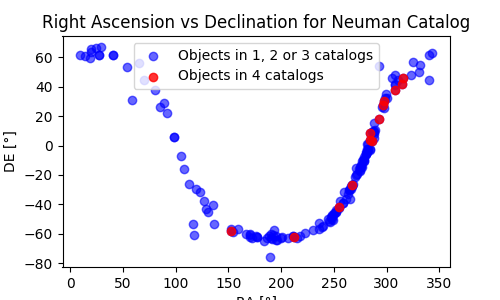

In [11]:
ra_deg = cat_neuman["RAdeg"]
de_deg = cat_neuman["DEdeg"]

coordenadas_comunes = cat_neuman[cat_neuman["Name"].isin(elementos_en_cuatro_catalogos)][["RAdeg", "DEdeg"]]
plt.figure(figsize=(5, 3))

plt.scatter(ra_deg, de_deg, marker='o', color='blue', alpha=0.6, label='Objects in 1, 2 or 3 catalogs')
plt.scatter(coordenadas_comunes["RAdeg"], coordenadas_comunes["DEdeg"], marker='o', color='red', alpha=0.8, label='Objects in 4 catalogs')

plt.title("Right Ascension vs Declination for Neuman Catalog")
plt.xlabel("RA [°]")
plt.ylabel("DE [°]")
plt.legend()
plt.show()

### Now we plot the same, but mor especific.

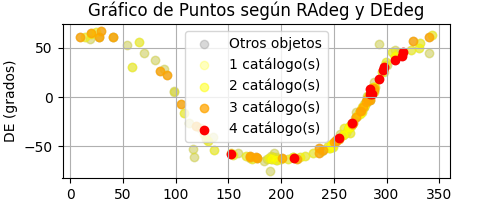

In [12]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["RAdeg", "DEdeg"]]

plt.figure(figsize=(5, 2))
colores = {1: ('yellow', 0.25), 2: ('yellow', 0.5), 3: ('orange', 0.75), 4: ('red', 1)}

plt.scatter(ra_deg, de_deg, marker='o', color='gray', alpha=0.3, label='Otros objetos')

for i, (color, alpha) in colores.items():
    coords = grupos_coordenadas.get(i, pd.DataFrame(columns=["RAdeg", "DEdeg"]))
    if not coords.empty:
        plt.scatter(coords["RAdeg"], coords["DEdeg"], marker='o', color=color, alpha=alpha, label=f'{i} catálogo(s)')

plt.title("Gráfico de Puntos según RAdeg y DEdeg")
plt.xlabel("RA (grados)")
plt.ylabel("DE (grados)")
plt.grid()
plt.legend()
plt.show()

### Now The same objects but for the Galactic Latitude and Longitude. As we see, almost all objects are plus minus five degrees above/below the galactic plane. 

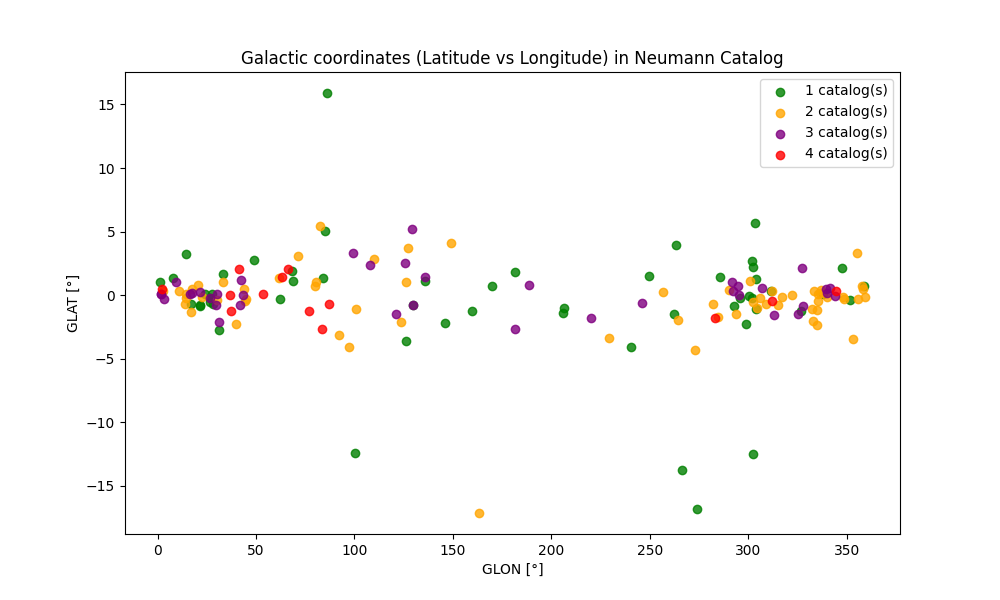

In [13]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["GLON", "GLAT"]]

plt.figure(figsize=(10, 6))
colores = {1: 'green', 2: 'orange', 3: 'purple', 4: 'red'}

for i, coords in grupos_coordenadas.items():
    plt.scatter(coords["GLON"], coords["GLAT"], marker='o', color=colores[i], alpha=0.8, label=f'{i} catalog(s)')

plt.title("Galactic coordinates (Latitude vs Longitude) in Neumann Catalog")
plt.xlabel("GLON [°]")
plt.ylabel("GLAT [°]")
plt.legend()
plt.show()

### We briefly remember the definition of the Galactic longitude (l) and the Galactic latitude (b).

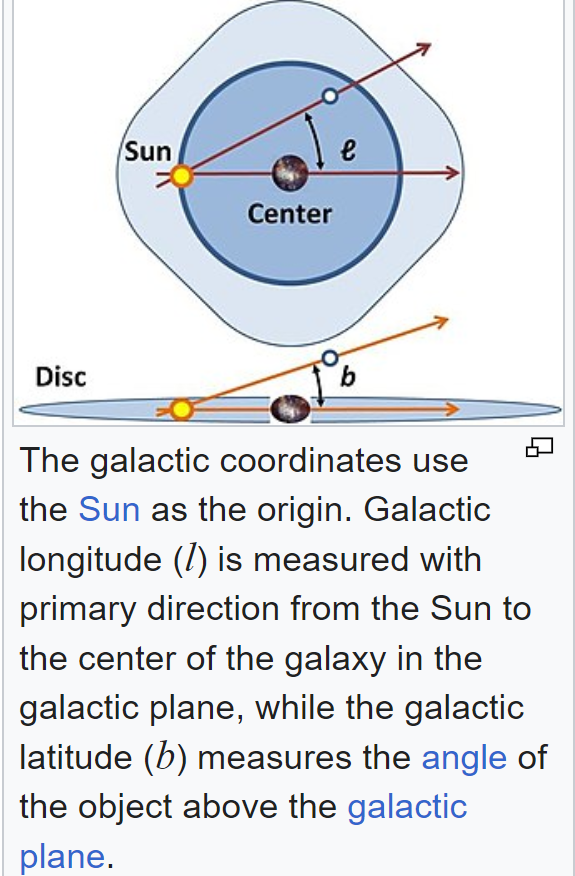

In [14]:
display(Image(filename='coordenadas_galacticas.png'))

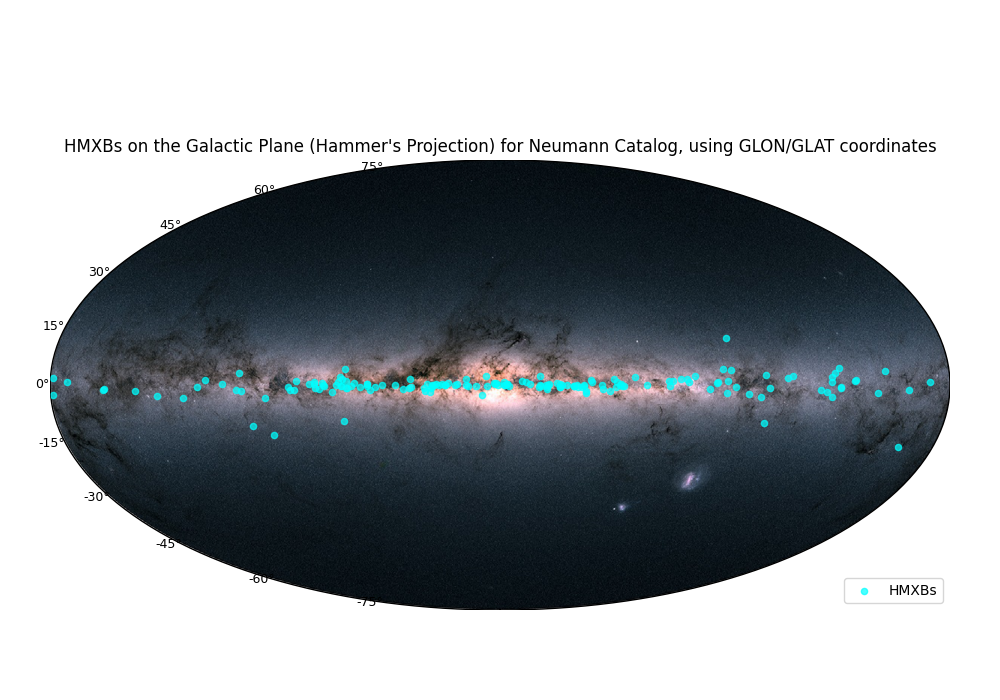

In [15]:
nombre_excel = "HMXB_catalogs.xlsx"
cat_neuman = pd.read_excel(nombre_excel, sheet_name="HMXB_cat_Neumann")
glon, glat = cat_neuman["GLON"].values, cat_neuman["GLAT"].values

fig, ax = plt.subplots(figsize=(10, 7))

m = Basemap(projection='hammer', lon_0=0, ax=ax)

img = mpimg.imread('galaxia.jpg')
m.imshow(img, origin='upper', alpha=1)

x, y = m(glon, glat)
m.scatter(x, y, c='cyan', s=20, alpha=0.7, label='HMXBs')

for lat in np.arange(-75, 76, 15):
    x_text, y_text = m(-180, lat)
    plt.text(x_text, y_text, f'{lat}°', ha='right', va='center', fontsize=9, color='black')

plt.subplots_adjust(left=0.05, right=0.95, top=0.8, bottom=0.1)

plt.title("HMXBs on the Galactic Plane (Hammer's Projection) for Neumann Catalog, using GLON/GLAT coordinates")
plt.legend(loc='lower right')

plt.show()


Now, I show the distribution in galactic coordinates for Neumann Catalog, also with error bars in diagonals, and the distance to the galactic plane in the colorbar.

Also, the distance $D_{plane}$ to the galactic plane, given the distance to the sun $d_{sun}$ and the latitude $b$:

$$D_{plane} = d_{sun}\cdot sin(b)$$

The $X$ and $Y$ distances in parsecs, are the following (given the galactic longitude $l$):

$$ X = d_{sun}\cdot cos(b)\cdot cos(l)$$
$$ Y = d_{sun}\cdot cos(b)\cdot sin(l)$$

The error bars were calculated taking into acount the low and high distances to the sun. 

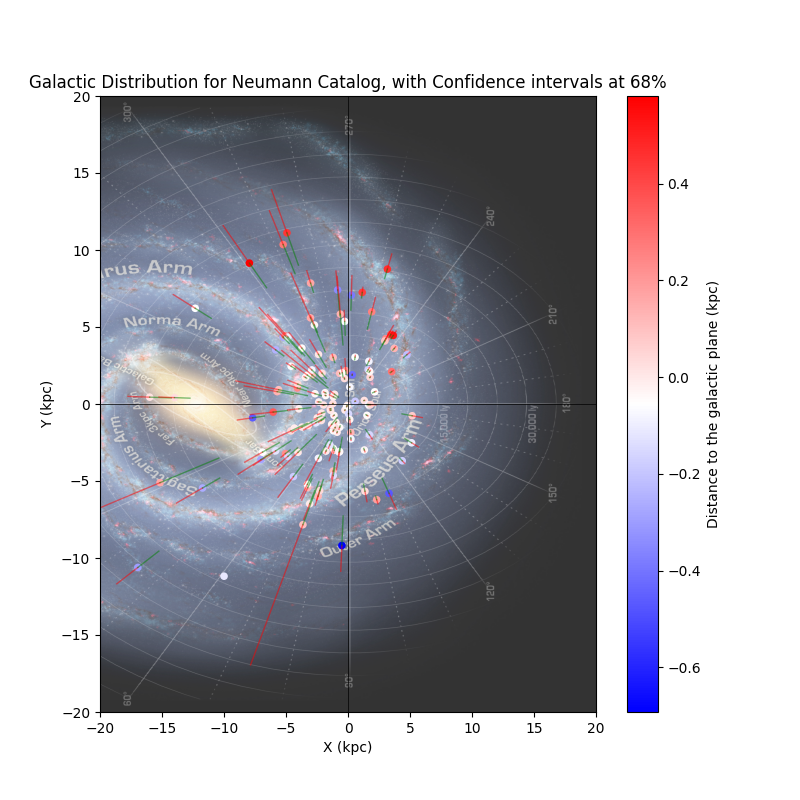

In [16]:
df = pd.read_excel('HMXB_catalogs.xlsx', sheet_name='HMXB_cat_Neumann')
glon = np.deg2rad(df['GLON'].values)
glat = np.deg2rad(df['GLAT'].values)
mean_dist = df['Mean_Dist'].values * u.pc
low_dist = df['Low_Dist'].values * u.pc
high_dist = df['High_Dist'].values * u.pc

mean_dist = mean_dist.to(u.kpc).value
low_dist = low_dist.to(u.kpc).value
high_dist = high_dist.to(u.kpc).value

error_sup = (high_dist - mean_dist) / 2
error_inf = (mean_dist - low_dist) / 2

error_sup = np.abs(error_sup)
error_inf = np.abs(error_inf)

x = mean_dist * np.cos(glat) * np.cos(glon)
y = mean_dist * np.cos(glat) * np.sin(glon)
x = -x
dist_plano = mean_dist * np.sin(glat)

x_err_sup = error_sup * (x / np.sqrt(x**2 + y**2))
y_err_sup = error_sup * (y / np.sqrt(x**2 + y**2))
x_err_inf = error_inf * (x / np.sqrt(x**2 + y**2))
y_err_inf = error_inf * (y / np.sqrt(x**2 + y**2))

plt.figure(figsize=(8, 8))
img = plt.imread('galaxia_coord.png')
plt.imshow(img, extent=[-20, 20, -20, 20], aspect='auto', zorder=0, alpha=0.8)

sc = plt.scatter(x, y, c=dist_plano, cmap="bwr", s=30, alpha=1, edgecolor='none', zorder=1)

cbar = plt.colorbar(sc)
cbar.set_label('Distance to the galactic plane (kpc)')

for i in range(len(x)):
    plt.plot([x[i], x[i] + x_err_sup[i]], 
             [y[i], y[i] + y_err_sup[i]], 
             color='red', alpha=0.5, linewidth=1.)
    plt.plot([x[i], x[i] - x_err_inf[i]], 
             [y[i], y[i] - y_err_inf[i]], 
             color='green', alpha=0.5, linewidth=1.)

plt.title('Galactic Distribution for Neumann Catalog, with Confidence intervals at 68%')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.grid(False)
plt.show()


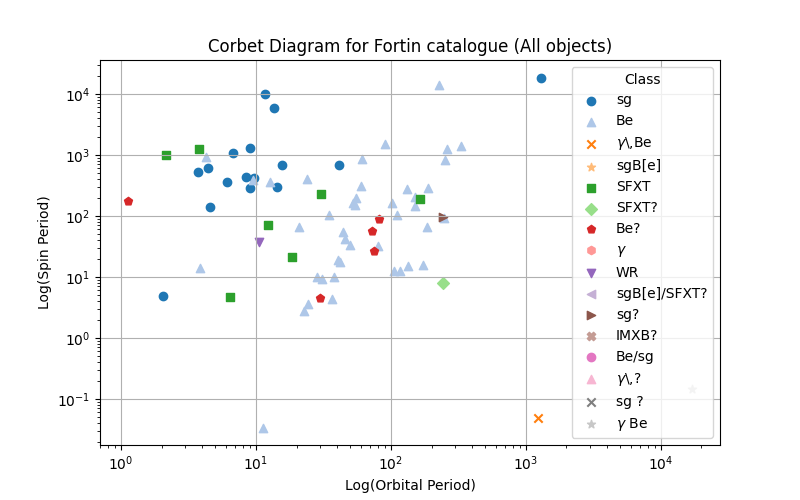

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

period = v2023_09_Fortin["Period"].values
spin_period = v2023_09_Fortin["Spin_period"].values
clases = v2023_09_Fortin["Class"].values

unique_classes = v2023_09_Fortin["Class"].dropna().unique()

colors = plt.colormaps['tab20'](range(len(unique_classes)))

markers = ['o', '^', 'x', '*', 's', 'D', 'p', 'h', 'v', '<', '>', 'X']

estilos_de_clase = {
    cls: {'color': colors[i % len(colors)], 'marker': markers[i % len(markers)]}
    for i, cls in enumerate(unique_classes)
}

fig, ax = plt.subplots(figsize=(8, 5))

for cls in estilos_de_clase.keys():
    mask = clases == cls
    ax.scatter(period[mask], spin_period[mask], 
               color=estilos_de_clase[cls]['color'], 
               marker=estilos_de_clase[cls]['marker'], 
               label=cls if len(period[mask]) > 0 else "")

ax.set_title("Corbet Diagram for Fortin catalogue (All objects)")
ax.set_xlabel("Log(Orbital Period)")
ax.set_ylabel("Log(Spin Period)")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()

ax.legend(title="Class", loc='upper right')
plt.show()


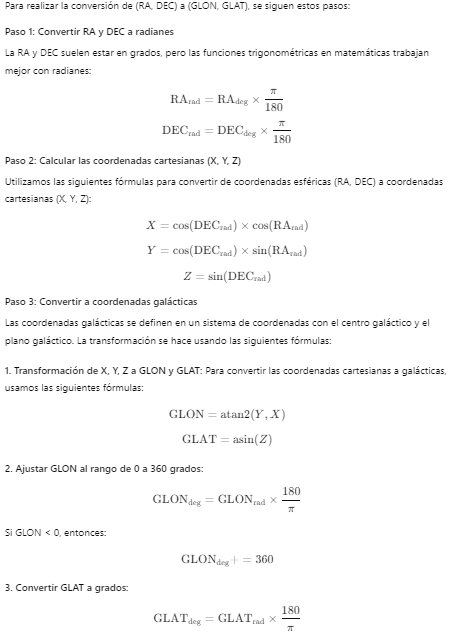

In [18]:
display(Image(filename='conversion_coordenadas.png'))

One hour is equivalent to $15°$, 1 minute to $\frac{15°}{60}$ and 1 second equal to $\frac{15°}{3600}$. In both kim catalogs their objects have their equatorial coordinates as:
$$RA: [hours, minutes, seconds]$$
$$DEC: [degrees, arcmin, arcsec]$$
And therefore we have to convert them to degrees [°]
Here we want to use kim catalog to corroborate the distribution of Neumann Catalog in RA/DEC and also LAT/LONG graphics.

In [19]:
kim_persistent = columna_kim_p.values
kim_transient = columna_kim_t.values

def convertir_coordenadas(elemento):
    partes = elemento.split()  # Dividir por espacios
    
    ra_hms = f"{partes[3]}h{partes[4]}m{partes[5]}s"  # Formato RA
    dec_dms = f"{partes[6]}d{partes[7]}m{partes[8]}s"  # Formato DEC
    spin_p = partes[9]
    ra = Angle(ra_hms).degree  # Convertir RA a grados
    dec = Angle(dec_dms).degree  # Convertir DEC a grados
    return ra, dec, spin_p

ra_persistent, dec_persistent, spin_p_pers = zip(*[convertir_coordenadas(el) for el in kim_persistent])

ra_transient, dec_transient, spin_p_trans = zip(*[convertir_coordenadas(el) for el in kim_transient])

Now we convert the equatorial coordinates to galactic coordinates.

In [20]:
def convert_to_galactic(ra, dec):
    coord = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')
    lon = coord.galactic.l.degree
    lat = coord.galactic.b.degree
    return lon, lat

lon_persistent, lat_persistent = convert_to_galactic(ra_persistent, dec_persistent)
lon_transient, lat_transient = convert_to_galactic(ra_transient, dec_transient)

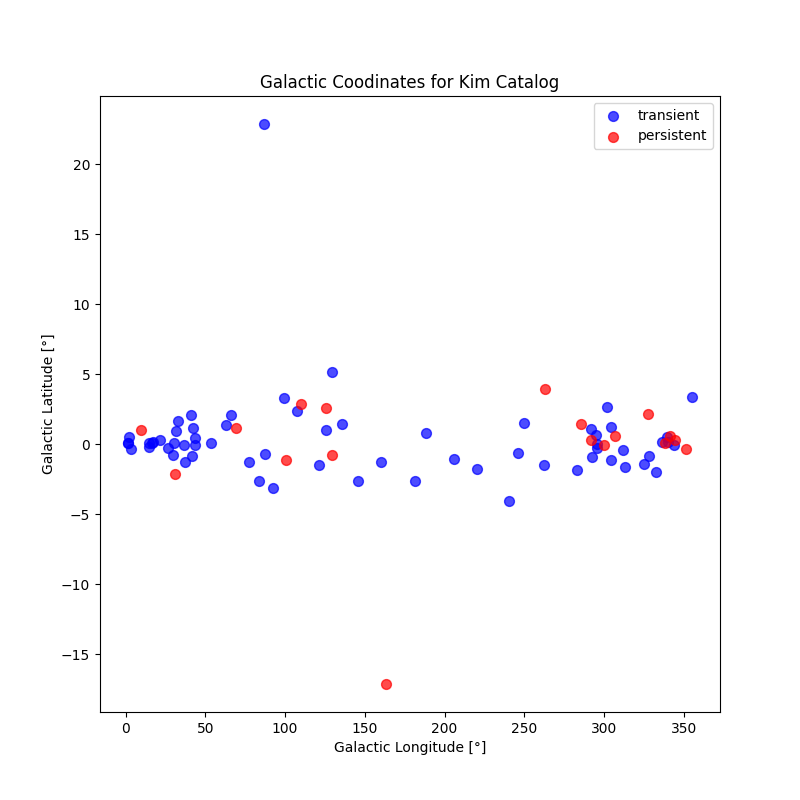

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(lon_transient, lat_transient, c='blue', marker='o', s=50, alpha=0.7, label="transient")
plt.scatter(lon_persistent, lat_persistent, c='red', marker='o', s=50, alpha=0.7, label="persistent")
plt.title('Galactic Coodinates for Kim Catalog')
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.legend(loc='best')
plt.show()


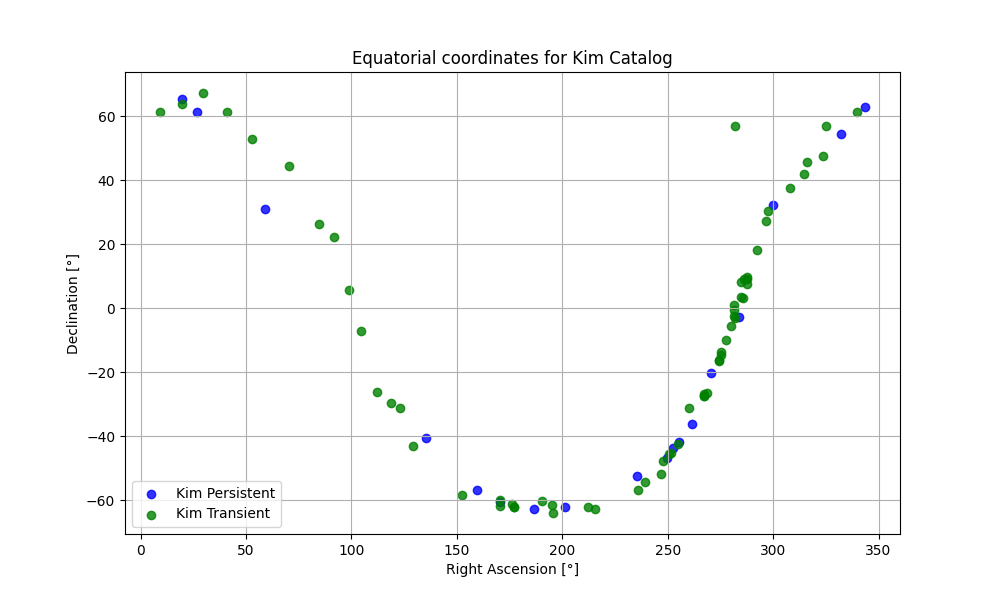

In [22]:
plt.figure(figsize=(10, 6))

plt.scatter(ra_persistent, dec_persistent, marker='o', color='blue', alpha=0.8, label='Kim Persistent')
plt.scatter(ra_transient, dec_transient, marker='o', color='green', alpha=0.8, label='Kim Transient')
plt.title("Equatorial coordinates for Kim Catalog")
plt.xlabel("Right Ascension [°]")
plt.ylabel("Declination [°]")
plt.grid()
plt.legend()
plt.show()

Now I do have to take some atributes from any of the catalogs. 

Now we are gonna take the following properties from the Fortin catalog.
- orbital period
- orbital eccentricity
- stellar mass
- stellar photosphere temperature
- spectral type of the star
- spin period of the star
- NS spin period
- NS mass

So we are going to take the intersection between the Neumann and Fortin catalog, and there are 99 objects with their columns:
-Fortin Catalog: 
    -Spectype, Mo, Period, Eccentricity, Spin_period, 
-Neumann Catalog:
    -Porb, SpType, Mean_Mass, Teff, 

In [23]:
common_names = set(nombres_neuman).intersection(set(nombres_fortin))
df_common_names = pd.DataFrame(common_names, columns=['Nombres Comunes'])

print(df_common_names)

          Nombres Comunes
0          PSR J2032+4127
1         IGR J16207-5129
2           XTE J1743-363
3   SRGA J124404.1-632232
4                 LS 5039
..                    ...
94        IGR J12341-6143
95        IGR J19294+1816
96         MAXI J0903-531
97     Swift J0243.6+6124
98        IGR J17503-2636

[99 rows x 1 columns]


In [24]:
cols_f = ['Main_ID', 'Spectype', 'Mo', 'Period', 'Eccentricity', 'Spin_period','Distance','Class']
cols_n = ['Name', 'SpType', 'Mean_Mass', 'Teff','N_H','Max_Soft_Flux']#'Ppulse', 'Porb'
v2023_09_Fortin_comunes = v2023_09_Fortin[v2023_09_Fortin['Main_ID'].isin(common_names)][cols_f]
cat_neuman_comunes = cat_neuman[cat_neuman['Name'].isin(common_names)][cols_n]

v2023_09_Fortin_comunes = v2023_09_Fortin_comunes.rename(columns={'Main_ID': 'Nombre'})
cat_neuman_comunes = cat_neuman_comunes.rename(columns={'Name': 'Nombre'})

df_final = pd.merge(v2023_09_Fortin_comunes, cat_neuman_comunes, on='Nombre')
df_final

Nombre      Spectype    Mo     Period  Eccentricity  \
0    IGR J00370+6122      BN0.7 Ib  22.0   15.66490        0.4800   
1            gam Cas      B0.5IVpe  13.0  203.37100        0.2600   
2        2S 0114+650         B1Iae  16.0   11.59830        0.1800   
3    IGR J01363+6610          B1Ve  12.5  159.00000           NaN   
4    RX J0146.9+6121        B1IIIe   9.6  330.00000           NaN   
..               ...           ...   ...        ...           ...   
94      GRO J2058+42  O9.5-B0IV-Ve  18.0   55.00000           NaN   
95  SAX J2103.5+4545          B0Ve  17.5   12.66536        0.4055   
96           Cep X-4       B1-B2Ve  10.8   20.85000           NaN   
97       1H 2202+501            Be   NaN        NaN           NaN   
98  SAX J2239.3+6116          B0Ve  17.5  262.00000           NaN   

    Spin_period  Distance Class                 SpType  Mean_Mass     Teff  \
0      674.0000    3401.0    sg  BN0.5II-III / BN0.7Ib        NaN  15411.1   
1           NaN       NaN    Be               B0.5IVpe        NaN      NaN   
2    10008.0000    4475.0    sg                  B1Iae        NaN  14131.5   
3           NaN    5816.0    Be                   B1Ve        NaN      NaN   
4     1407.4000    2751.0    Be               B1III-Ve        NaN      NaN   
..          ...       ...   ...                    ...        ...      ...   
94     195.2500    8861.0    Be           O9.5-B0IV-Ve        NaN  31462.3   
95     358.6100    6218.0    Be                   B0Ve        NaN  29372.9   
96      65.3508    7446.0    Be                B1-B2Ve        NaN      NaN   
97          NaN    1116.0    Be                    B3e        NaN      NaN   
98    1247.2000    7387.0    Be                   B0Ve        NaN  16439.9   

       N_H  Max_Soft_Flux  
0   11.820        95.5227  
1      NaN       274.0580  
2      NaN       130.8930  
3      NaN         0.1174  
4    3.908       105.5000  
..     ...            ...  
94     NaN       167.9000  
95  28.000       111.6000  
96   7.115       470.1000  
97     NaN            NaN  
98     NaN         0.3788  

[99 rows x 13 columns]

In [25]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Suponiendo que ya tienes df_final listo
# df_final = pd.merge(v2023_09_Fortin_comunes, cat_neuman_comunes, on='Nombre')

# Crear la función para graficar
def graficar_interactivo(df, eje_x, eje_y):
    # Crear el gráfico de dispersión interactivo
    fig = px.scatter(df, x=eje_x, y=eje_y,
                     title=f"Gráfico de dispersión: {eje_x} vs {eje_y}",
                     labels={eje_x: eje_x, eje_y: eje_y})
    
    # Mostrar el gráfico
    fig.show()

# Crear los widgets para seleccionar las variables de los ejes X y Y
eje_x_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[0],  # Valor por defecto
    description='Eje X:',
)

eje_y_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[1],  # Valor por defecto
    description='Eje Y:',
)

# Usar `interact` para crear la interacción entre los widgets y la función de graficado
interact(graficar_interactivo, df=widgets.fixed(df_final), eje_x=eje_x_widget, eje_y=eje_y_widget)


interactive(children=(Dropdown(description='Eje X:', options=('Nombre', 'Spectype', 'Mo', 'Period', 'Eccentric…

<function __main__.graficar_interactivo(df, eje_x, eje_y)>

In [26]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Filtrar el DataFrame eliminando filas con NaN en la columna seleccionada para tamaño
def graficar_interactivo(df, eje_x, eje_y, tamaño):
    # Eliminar filas con valores NaN en la columna tamaño
    df_limpio = df.dropna(subset=[tamaño])
    
    # Crear el gráfico de dispersión interactivo con tamaño variable
    fig = px.scatter(df_limpio, x=eje_x, y=eje_y, size=tamaño,
                     title=f"Gráfico de dispersión: {eje_x} vs {eje_y} (Tamaño: {tamaño})",
                     labels={eje_x: eje_x, eje_y: eje_y, tamaño: tamaño})
    
    # Mostrar el gráfico
    fig.show()

# Crear los widgets para seleccionar las variables de los ejes X, Y y el tamaño
eje_x_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[0],  # Valor por defecto
    description='Eje X:',
)

eje_y_widget = widgets.Dropdown(
    options=df_final.columns.tolist(),
    value=df_final.columns[1],  # Valor por defecto
    description='Eje Y:',
)

tamaño_widget = widgets.Dropdown(
    options=[col for col in df_final.columns if pd.api.types.is_numeric_dtype(df_final[col])],  # Solo variables numéricas
    value=df_final.select_dtypes(include=['number']).columns[0],  # Valor por defecto
    description='Tamaño:',
)

# Usar `interact` para crear la interacción entre los widgets y la función de graficado
interact(graficar_interactivo, df=widgets.fixed(df_final), eje_x=eje_x_widget, eje_y=eje_y_widget, tamaño=tamaño_widget)


interactive(children=(Dropdown(description='Eje X:', options=('Nombre', 'Spectype', 'Mo', 'Period', 'Eccentric…

<function __main__.graficar_interactivo(df, eje_x, eje_y, tamaño)>

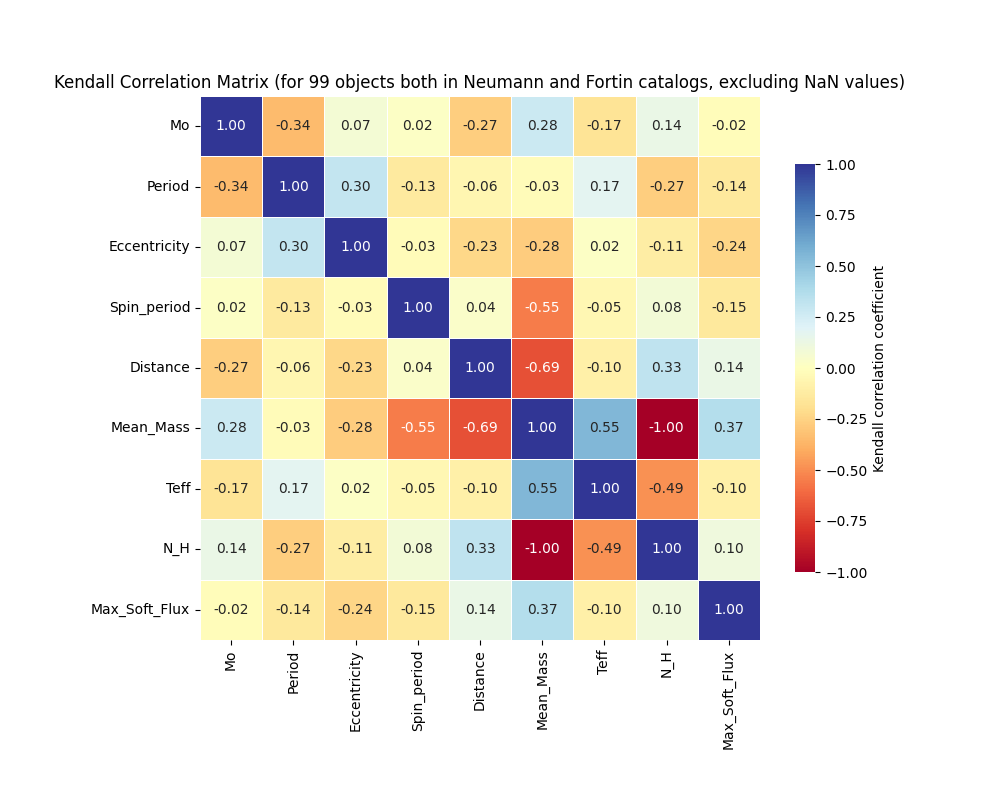

In [28]:
df_numerico = df_final.select_dtypes(include=['float64', 'int64'])

matriz_correlacion_kendall = df_numerico.corr(method='kendall')

num_objetos = len(df_numerico)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap='RdYlBu', center=0, fmt='.2f',
            linewidths=0.5, cbar_kws={'shrink': .75, 'label': 'Kendall correlation coefficient'})

plt.title(f'Kendall Correlation Matrix (for {num_objetos} objects both in Neumann and Fortin catalogs, excluding NaN values)')

plt.subplots_adjust(bottom=0.2, left=0.2)

plt.show()


In [29]:
matriz_correlacion_kendall

Mo    Period  Eccentricity  Spin_period  Distance  \
Mo             1.000000 -0.344892      0.074583     0.018660 -0.270562   
Period        -0.344892  1.000000      0.304714    -0.134354 -0.056512   
Eccentricity   0.074583  0.304714      1.000000    -0.030817 -0.230150   
Spin_period    0.018660 -0.134354     -0.030817     1.000000  0.035111   
Distance      -0.270562 -0.056512     -0.230150     0.035111  1.000000   
Mean_Mass      0.276026 -0.028172     -0.276026    -0.547723 -0.690066   
Teff          -0.173580  0.173171      0.018149    -0.049462 -0.100051   
N_H            0.136558 -0.272452     -0.110702     0.083485  0.325758   
Max_Soft_Flux -0.019035 -0.143063     -0.241072    -0.148235  0.137530   

               Mean_Mass      Teff       N_H  Max_Soft_Flux  
Mo              0.276026 -0.173580  0.136558      -0.019035  
Period         -0.028172  0.173171 -0.272452      -0.143063  
Eccentricity   -0.276026  0.018149 -0.110702      -0.241072  
Spin_period    -0.547723 -0.049462  0.083485      -0.148235  
Distance       -0.690066 -0.100051  0.325758       0.137530  
Mean_Mass       1.000000  0.547723 -1.000000       0.366234  
Teff            0.547723  1.000000 -0.492063      -0.097252  
N_H            -1.000000 -0.492063  1.000000       0.102491  
Max_Soft_Flux   0.366234 -0.097252  0.102491       1.000000

What we do now is use euclidian distance for the dendogram, and the conversion from correlation to distance is the following:
Distance = 1 - Correlation.
Therefore, a correlation of -1 is equivalent to 2 distance, and a perfect correlation (1) is equivalent to 0 distance.  

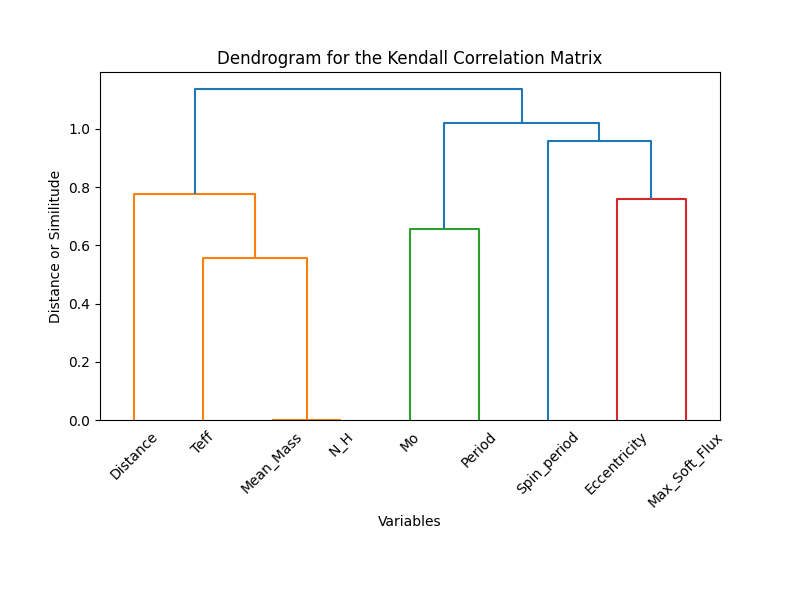

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.spatial.distance as ssd

df_numerico = df_final.select_dtypes(include=['float64', 'int64'])

matriz_correlacion_kendall = df_numerico.corr(method='kendall')

distancia = 1 - np.abs(matriz_correlacion_kendall)
vinculos = linkage(ssd.squareform(distancia), method='ward')

plt.figure(figsize=(8, 6))
dendrogram(vinculos, labels=matriz_correlacion_kendall.columns, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram for the Kendall Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Distance or Similitude')

plt.subplots_adjust(bottom=0.3) 

plt.show()

Explanation:
- Cluster 1 (Spin_period and Ppulse): Makes sense cause the spin period of the NS correlates to the frequency with which it radiates, so, the spin period increases when the pulse period decreases. 
- Cluster 2 (Max_Soft_Flux, Distance and N_H)
- Cluster 3 (Excentricity, Period and Porb): makes sense cause of the properties of the orbit (particularly, given the relation of the Kepler's third law)
- Cluster 4 (Mo, Mean_Mass and Teff)

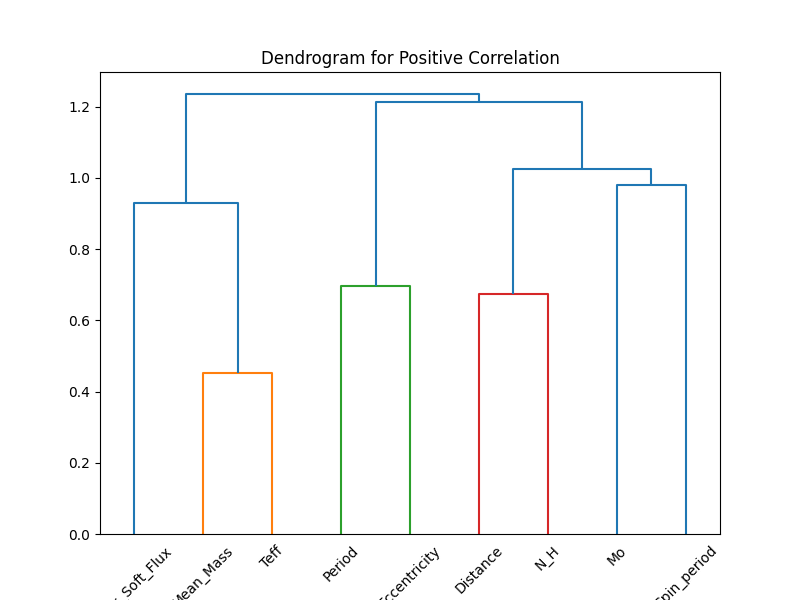

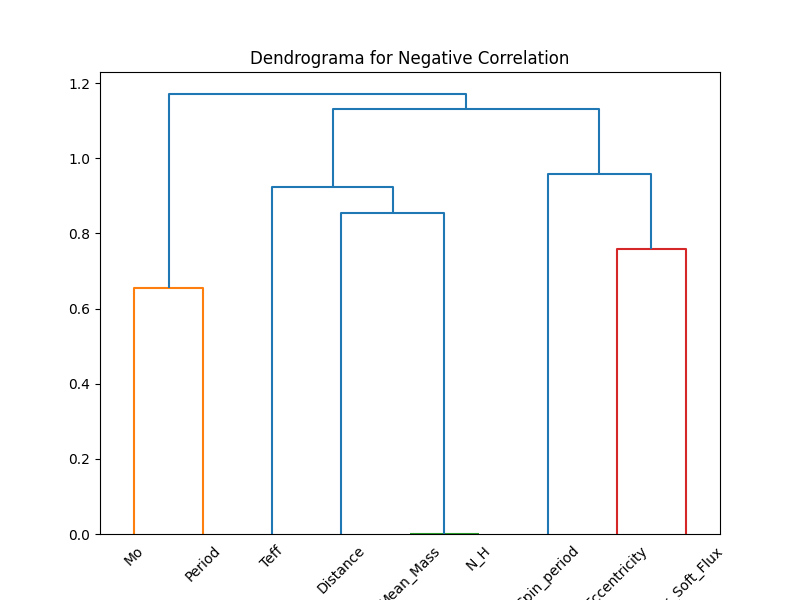

In [31]:
matriz_positiva = matriz_correlacion_kendall[matriz_correlacion_kendall > 0].fillna(0)
distancia_positiva = 1 - matriz_positiva
vinculos_positivos = linkage(ssd.squareform(distancia_positiva), method='ward')

plt.figure(figsize=(8, 6))
dendrogram(vinculos_positivos, labels=matriz_positiva.columns, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram for Positive Correlation')
plt.show()

matriz_negativa = matriz_correlacion_kendall[matriz_correlacion_kendall < 0].fillna(0)
np.fill_diagonal(matriz_negativa.values,1)
distancia_negativa = 1 - np.abs(matriz_negativa)
vinculos_negativos = linkage(ssd.squareform(distancia_negativa), method='ward')

plt.figure(figsize=(8, 6))
dendrogram(vinculos_negativos, labels=matriz_negativa.columns, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrograma for Negative Correlation')
plt.show()


Here we can see all the correlations splitted into two dendograms, one with the positive and the other with the negative correlations between variables.

How do you include the level of significance in the kendall correlation matrix? (1, 2 and 3 sigma)

## Task1 (done)

Check the content of the .corr method for panda arrays, and the detail of the computation performed when you use method=‘kendall'

Basically, the .corr method does not consider the NaN values. So, now i make the imputation with the mean. But the imputation with the mean or with the median can give any value that isn't real, because the quantity of data can be even or not even. 

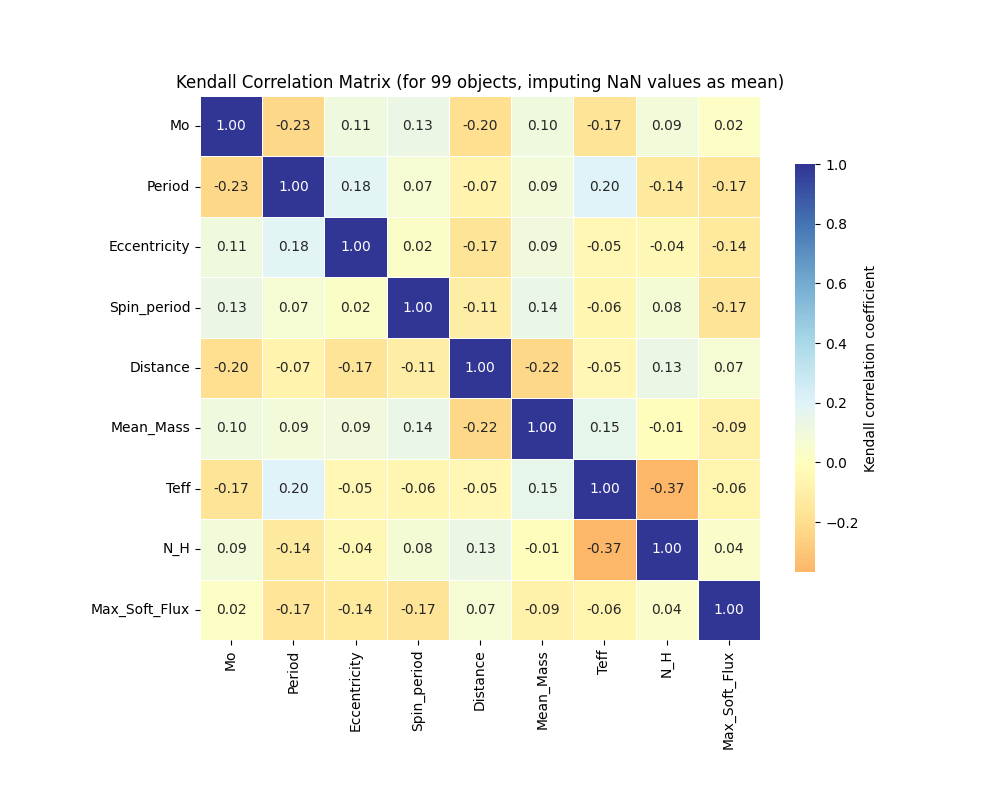

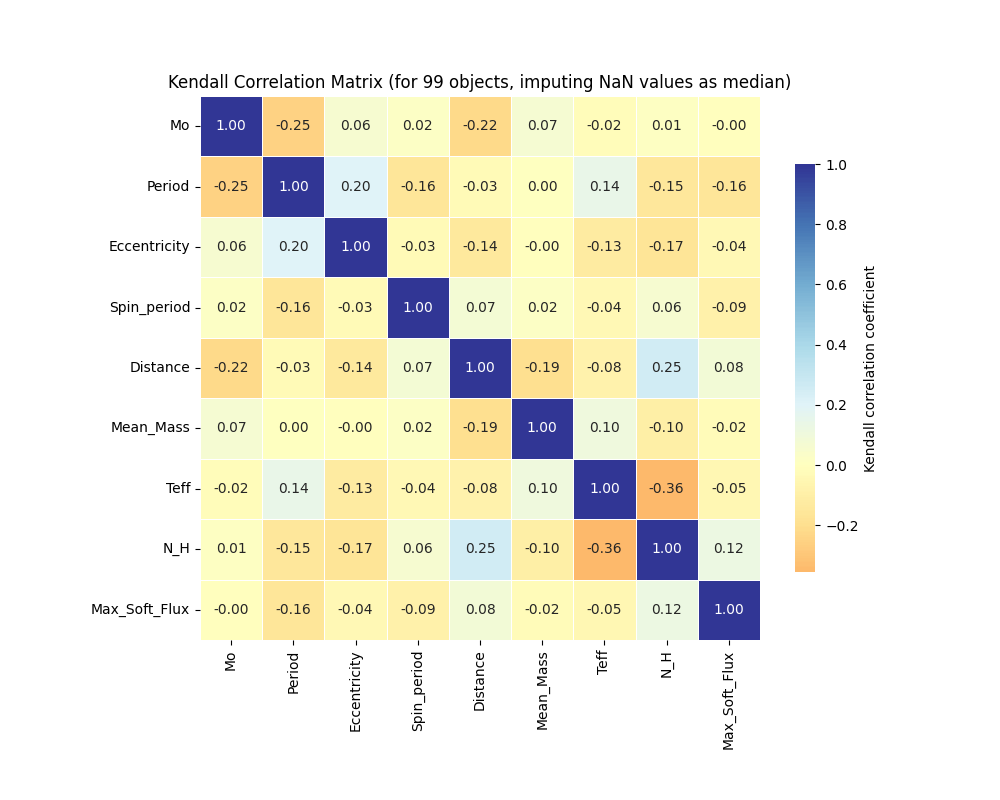

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_imputado_media = df_final.copy()
df_numerico = df_imputado_media.select_dtypes(include=['float64', 'int64'])
df_numerico.fillna(df_numerico.mean(), inplace=True)
matriz_correlacion_kendall_media = df_numerico.corr(method='kendall')
num_objetos = len(df_numerico)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_kendall_media, annot=True, cmap='RdYlBu', center=0, fmt='.2f',
            linewidths=0.5, cbar_kws={'shrink': .75, 'label': 'Kendall correlation coefficient'})
plt.title(f'Kendall Correlation Matrix (for {num_objetos} objects, imputing NaN values as mean)')
plt.subplots_adjust(bottom=0.2, left=0.2)
plt.show()

df_imputado_mediana = df_final.copy()
df_numerico = df_imputado_mediana.select_dtypes(include=['float64', 'int64'])
df_numerico.fillna(df_numerico.median(), inplace=True)
matriz_correlacion_kendall_mediana = df_numerico.corr(method='kendall')
num_objetos = len(df_numerico)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_kendall_mediana, annot=True, cmap='RdYlBu', center=0, fmt='.2f',
            linewidths=0.5, cbar_kws={'shrink': .75, 'label': 'Kendall correlation coefficient'})
plt.title(f'Kendall Correlation Matrix (for {num_objetos} objects, imputing NaN values as median)')
plt.subplots_adjust(bottom=0.2, left=0.2)
plt.show()


## Task2 (done)

Remove Ppulse (or spin_period) and Porb (or Period). 

## Task3:

**Figure out why there are disagreements between Porb and Period (from 2 different catalogs, right?).** First of all, we have to define what Ppulse and Porb are in the papers. Ppulse comes from Neumann Catalog, while Spin_period comes from Fortin Catalog. 

In Neumann Catalog, Ppulse is: "Pulsation Period (spin) of the binary (with NS) in seconds if determined". 

Authors made the Fortin Catalog from a mix between existing and new data about HXMB's. For example, in Fortin W63 X-1 have a Spin_period of 36 seconds, while in Neuman it has a 36 seconds ppulse. Both Catalogs come from a mix between other catalogs, so it's difficult to answer. I noticed that the differences became from numbers like 36.0 and 36.01 (the difference is minimal!).

<font color="blue">The spin_period increases or decreases with time?</font>

## Task4 (done):

1, 2, 3sigma meaning: Confidence interval en.wikipedia.org

## Task5 (done)

Look for a way to plot 2 dendrograms for >0 and <0 correlations. Done.

## Task6 (in progress):

Plot histogram of soft_flux ((geometric?) average between min and max) and compare to Fortin fig.4

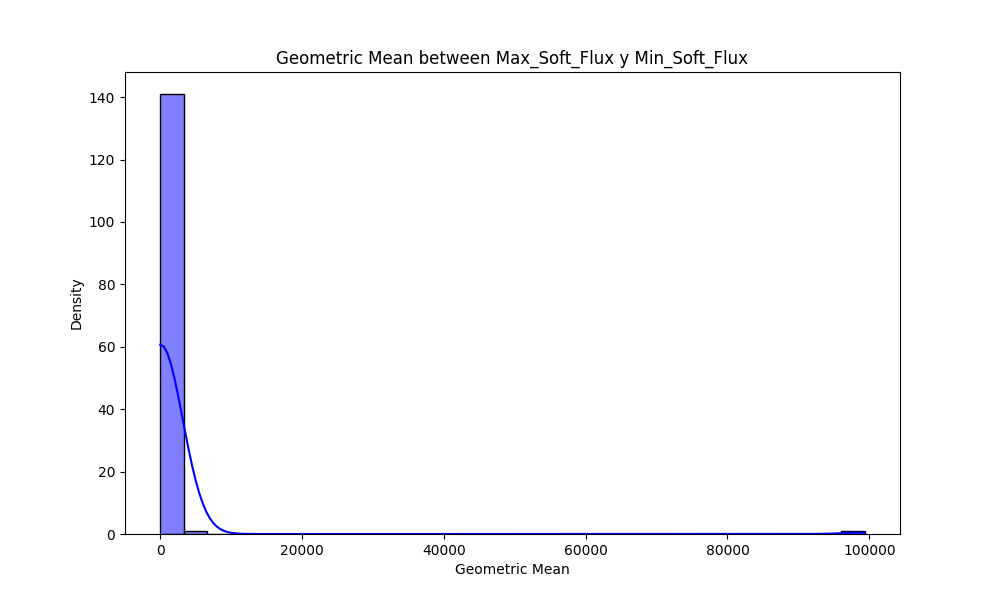

In [33]:
Max_Soft_Flux = cat_neuman['Max_Soft_Flux']
Min_Soft_Flux = cat_neuman['Min_Soft_Flux']

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['Geometric_Mean'] = np.sqrt(df['Max_Soft_Flux'] * df['Min_Soft_Flux'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Geometric_Mean'], kde=True, bins=30, color='blue')

plt.title('Geometric Mean between Max_Soft_Flux y Min_Soft_Flux')
plt.xlabel('Geometric Mean')
plt.ylabel('Density')

plt.show()


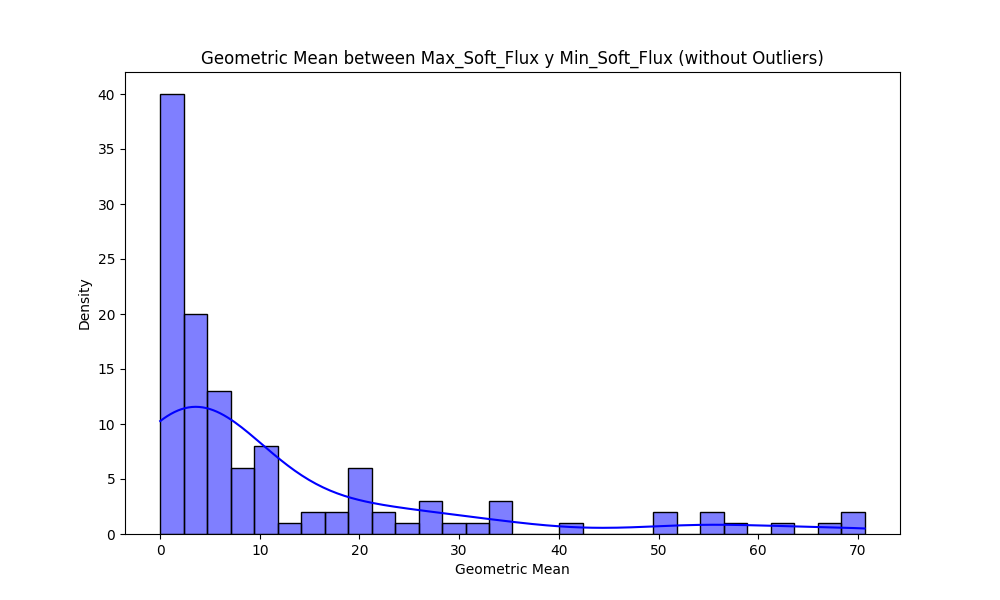

In [34]:
# Calcular Q1, Q3 e IQR
Q1 = df['Geometric_Mean'].quantile(0.25)
Q3 = df['Geometric_Mean'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar datos sin outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Geometric_Mean'] >= lower_bound) & (df['Geometric_Mean'] <= upper_bound)]

# Graficar después de eliminar outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Geometric_Mean'], kde=True, bins=30, color='blue')

plt.title('Geometric Mean between Max_Soft_Flux y Min_Soft_Flux (without Outliers)')
plt.xlabel('Geometric Mean')
plt.ylabel('Density')

plt.show()


## Task7 (in progress)


Recompute Kendall and dendrogram with mean_soft_flux, mean_hard_flux and hardness (which is the ratio between mean_hard_flux and mean_soft_flux). To understand the meaning of hardness, check Fig.2 from https://arxiv.org/pdf/2410.21456 and Fig.10 from https://www.aanda.org/articles/aa/pdf/2023/06/aa45708-22.pdf.

## Task8 (in progress):

Deduce stellar properties from spectral type (in particular the mass and, if possible, radius, luminosity and temperature). FYI, the standard procedure to deduce the mass of a star from 3 different methods is (here, just focus on getting the spectral-type - mass):
1. Spectral-type - mass: it is obtained by computing the mean and standard deviation of the evolutionary masses of apparently-single stars with similar spectral types. The masses of these stars can be computed for instance from their measured physical properties (e.g., luminosity, effective temperature, surface gravity) as input in the [BONNSAI Bayesian tool](https://www.astro.uni-bonn.de/stars/bonnsai/) ([Shneider+14](https://ui.adsabs.harvard.edu/abs/2014A&A...570A..66S/abstract)), which estimates the evolutionary mass using single-star evolution tracks (see [Schneider+18](https://ui.adsabs.harvard.edu/abs/2018A&A...618A..73S/abstract) for an example). 
2. Evolutionary mass: it is obtained by inputting the values of stellar luminosity and effective temperature in the BONNSAI tool.
3. Spectroscopic mass: it is obtained from the surface gravity (deduced from the width of the absorption lines in the spectrum) and stellar radius derived from spectroscopy. The stellar parameters and abundances are derived from a spectroscopic analysis (e.g. with the CMFGEN model atmosphere code, see section “spectral analysis” in supplementary information [Shenar+22](https://ui.adsabs.harvard.edu/abs/2022NatAs...6.1085S/abstract) for more details).

Links to papers and catalogs

[Neumann+23
HMXB_cat](http://astro.uni-tuebingen.de/~xrbcat/HMXBcat.html)



[Fortin+23
v2023-09](https://ui.adsabs.harvard.edu/abs/2023A&A...671A.149F/abstract)



[Kim+23
kim_*](https://ui.adsabs.harvard.edu/abs/2023ApJS..268...21K/abstract) (bottom of tables 2 and 3 in appendix)



[Malacaria+20
malacaria](https://ui.adsabs.harvard.edu/search/q=author%3A%22%5Emalacaria%2Cc%22&sort=date%20desc%2C%20bibcode%20desc&p_=0) (bottom of table 1)

## Task 9 (in progress)

1. The correlation between NS spin and orbital period doesn't appear in your Kendall matrix, while it does in the Corbet diagram but only for systems with a Be start. Could you set up a switch such as you can perform the same steps (Kendall+dendrogram) either for all stars (as you already did) or separately for Be stars on one hand, and for other types of stars on the other hand? 

## Task 10 (in progress)

2. A more involving idea. In the database you're using, an important information is missing : the stellar wind properties (mass loss rate and terminal wind speed). It's especially important when the donor star is a blue supergiant (i.e. not a Be star). The main reason it's missing is that we don't have *that* many systems where it's measured accurately. Yet, in this paper (https://ui.adsabs.harvard.edu/abs/2020A%26A...634A..49H/abstract), you'll find data for 6 systems which should be in the catalogs you're using. Could you check it? I know that it's very few objects, but we could extrapolate the values to other types of similar spectral type. Could you quickly check whether these 2 new parameters correlate with the others? 

## Task 11 (in progress)

3. Linked to the previous point: it'd be useful in your jupyter notebook if you had an interface where we can easily select two parameters to be plotted for all the systems, to verify whether the Kendall coefficients make sense. Possibly, you could plot two more parameters (e.g. as dots of different size and color).

## Task 12 (done)

Could you also plot a [Venn diagram](https://en.wikipedia.org/wiki/Venn_diagram) of the systems, with each block representing a parameter (e.g. the ~6 ones I sent last time and that you use for the Kendall tau matrix)? Something along [these lines](https://upload.wikimedia.org/wikipedia/commons/5/56/6-set_Venn_diagram_SMIL.svg) for instance? It would serve to know which is the fraction of systems where all the parameters are known.



C:\Users\Acer\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning:

`get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead

C:\Users\Acer\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning:

`venn6()` is retained for backwards compatibility; use `venn()` instead



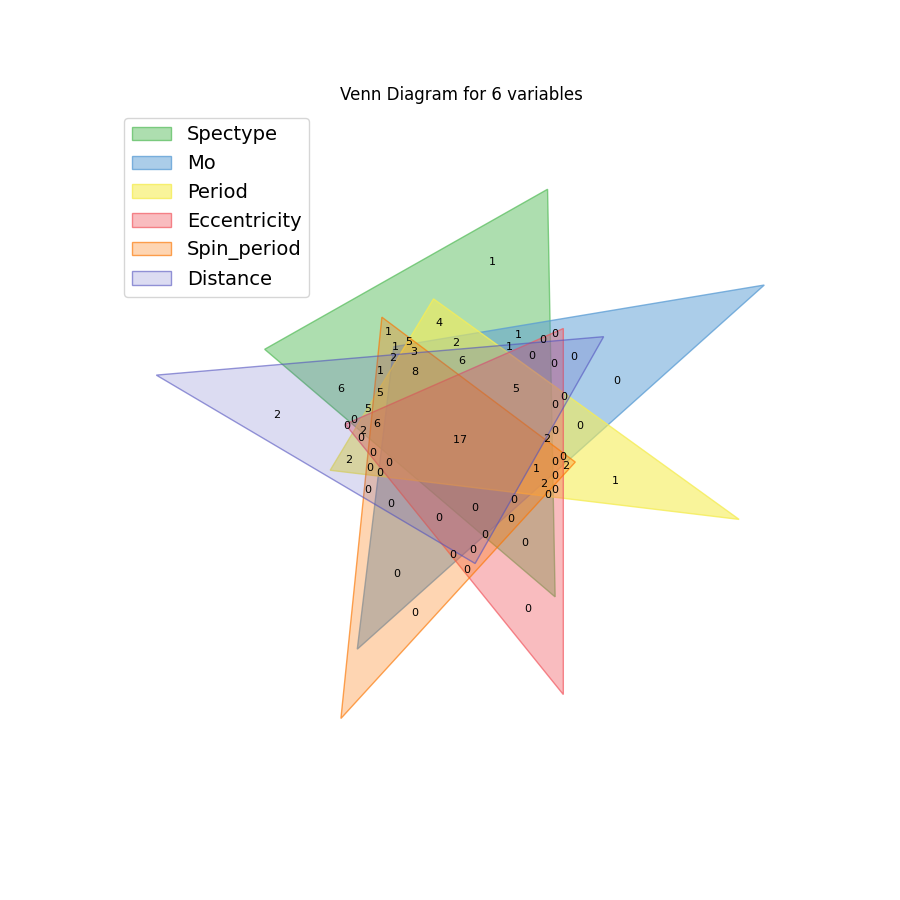

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import venn


def Venn_diagram(minim, maxim):
    sets = [set(df_final.index[df_final[col].notna()]) for col in df_final.columns[minim:maxim]]

    labels = venn.get_labels(sets, fill=['number'])

    fig, ax = venn.venn6(labels, names=df_final.columns[minim:maxim])
    for text in ax.texts:
        text.set_fontsize(8)
    plt.title(f"Venn Diagram for {maxim-minim} variables")
    plt.show()
    
Venn_diagram(1,7)

In [36]:
columns_range = df_final.columns[1:7]  # Rango de columnas
df_all_values = df_final.dropna(subset=columns_range).copy()

df_all_values

Nombre     Spectype    Mo        Period  Eccentricity  \
0    IGR J00370+6122     BN0.7 Ib  22.0     15.664900       0.48000   
2        2S 0114+650        B1Iae  16.0     11.598300       0.18000   
8        1A 0535+262   O9.5III-Ve  20.0    110.300000       0.47000   
11     SGR 0755-2933         B0Ve  18.5     59.690000       0.06000   
15      GRO J1008-57          B0e  17.5    247.800000       0.68000   
19           Cen X-3  O6-7 II-III  20.2      2.033000       0.00010   
23    1E 1145.1-6141        B2Iae  14.0     14.365000       0.20000   
26      PSR B1259-63       O9.5Ve  22.5   1236.724526       0.86988   
60   IGR J17544-2619         O9Ib  23.0     12.172000       0.44000   
61   IGR J18027-2016         B1Ib  20.0      4.569600       0.20000   
77     XTE J1859+083       B0-2Ve  12.5     37.970000       0.12700   
81        4U 1909+07   O7.5-9.5If  32.0      4.400700       0.02100   
87     XTE J1946+274    B0-1IV-Ve  15.0    172.700000       0.24600   
88       KS 1947+300         B0Ve  17.5     40.415000       0.03400   
91    PSR J2032+4127         B0Ve  15.0  17000.000000       0.96100   
92      EXO 2030+375         B0Ve  17.5     46.021400       0.41900   
95  SAX J2103.5+4545         B0Ve  17.5     12.665360       0.40550   

     Spin_period  Distance         Class                 SpType  Mean_Mass  \
0     674.000000    3401.0            sg  BN0.5II-III / BN0.7Ib        NaN   
2   10008.000000    4475.0            sg                  B1Iae        NaN   
8     103.400000    1793.0            Be               O9.7IIIe        NaN   
11    307.800000    3356.0            Be                   B0Ve        NaN   
15     93.587000    3536.0            Be               B0 IIIVe        NaN   
19      4.801880    6784.0            sg            O6.5 II-III       1.57   
23    298.000000    8097.0            sg                  B2Iae        NaN   
26      0.047760    2170.0  $\gamma$\,Be                 O9.5Ve        NaN   
60     71.490000    2425.0          SFXT                   O9Ib        NaN   
61    139.612000    8526.0            sg                   B1Ib       1.57   
77      9.791560    4799.0            Be                 B0-2Ve        NaN   
81    603.600000    4965.0            sg             O7.5-9.5If        NaN   
87     15.788010   13139.0            Be               B01-IVVe        NaN   
88     18.700000   15126.0            Be                   B0Ve        NaN   
91      0.143247    1680.0   $\gamma$ Be             B0:e/B0:Vn        NaN   
92     41.306000    2410.0            Be                   B0Ve        NaN   
95    358.610000    6218.0            Be                   B0Ve        NaN   

        Teff      N_H  Max_Soft_Flux  
0   15411.10   11.820        95.5227  
2   14131.50      NaN       130.8930  
8   41504.00    1.786        96.3500  
11  37141.40    8.150         5.1350  
15  17671.50   13.600       116.0000  
19  13653.09   17.000      3861.0000  
23   7178.09  100.000       503.3000  
26  35609.80    7.323        40.9181  
60   6729.06      NaN        29.0903  
61   5179.70      NaN        56.2100  
77       NaN      NaN        12.5900  
81       NaN      NaN       249.6000  
87   5280.80      NaN      1303.0000  
88  33413.80   14.580      1260.7400  
91  21445.04   10.000         4.3458  
92   5190.30      NaN       260.0680  
95  29372.90   28.000       111.6000

Here the systems that have only Mo column NaN's values (6 systems)

In [37]:
columns_no_nan = ['Spectype', 'Period', 'Eccentricity', 'Spin_period', 'Distance']

df_nan_mo_filtered = df_final[df_final[columns_no_nan].notna().all(axis=1) & df_final['Mo'].isna()].copy()

df_nan_mo_filtered

Nombre Spectype  Mo    Period  Eccentricity  Spin_period  \
6   Swift J0243.6+6124    O9.5V NaN   28.3000        0.0920      9.86610   
20     IGR J11215-5952     B1Ia NaN  164.6000        0.8000    186.78000   
35       XTE J1543-568      Be? NaN   75.5600        0.0300     27.12156   
71     AX J1841.0-0536     B1Ib NaN    6.4530        0.1600      4.73940   
74     IGR J18483-0311   B0.5Ia NaN   18.5450        0.4000     21.05260   
78          4U 1901+03  B8-9 IV NaN   22.5827        0.0363      2.76100   

    Distance Class     SpType  Mean_Mass      Teff    N_H  Max_Soft_Flux  
6     5189.0    Be     O9.5Ve        NaN  33857.70  24.67      2019.9999  
20    7175.0  SFXT     B0.5Ia        NaN   8259.16  37.87        64.4271  
35    5388.0   Be?        Be?        NaN       NaN    NaN       123.7000  
71    2828.0  SFXT       B1Ib        NaN       NaN    NaN        27.2400  
74    2722.0  SFXT  B0.5-1Iab        NaN   3874.70    NaN        73.1700  
78    5575.0    Be   B8-9 IVe        NaN   4971.00    NaN            NaN

Here the 5 systems that only have NaN values on the Spin_Period column. These are potential black holes!

In [38]:
columns_no_nan = ['Spectype', 'Period', 'Eccentricity', 'Mo', 'Distance']

df_nan_spin_period_filtered = df_final[df_final[columns_no_nan].notna().all(axis=1) & df_final['Spin_period'].isna()].copy()

df_nan_spin_period_filtered

Nombre     Spectype    Mo    Period  Eccentricity  Spin_period  \
17  1FGL J1018.6-5856          O6V  22.9  16.55070         0.531          NaN   
18           HD 96670      O7V(f)n  22.7   5.28388         0.120          NaN   
68            LS 5039    ON6.5V(f)  23.0   3.90607         0.350          NaN   
82             SS 433         A7Ib  11.3  13.08000         0.050          NaN   
89            Cyg X-1  O9.7Iabpvar  40.6   5.59980         0.000          NaN   

    Distance         Class       SpType  Mean_Mass      Teff     N_H  \
17    4324.0  $\gamma$\,Be     O6V((f))        NaN   8938.30   9.732   
18    3131.0            Be    O8.5f(n)p        6.2       NaN     NaN   
68    1898.0  $\gamma$\,Be   ON6V((f))z        NaN  10433.24   9.750   
82    7290.0            sg       A3-7 I        4.2       NaN  14.000   
89    2146.0            sg  O9.7Iabpvar       21.2  20879.50   0.427   

    Max_Soft_Flux  
17         1.6827  
18         0.5187  
68         9.3503  
82       244.7510  
89     99360.0011

Eccentricity missing values: (8 systems)

In [39]:
columns_no_nan = ['Spectype', 'Period', 'Spin_period', 'Mo', 'Distance']

df_nan_eccentricity_filtered = df_final[df_final[columns_no_nan].notna().all(axis=1) & df_final['Eccentricity'].isna()].copy()

df_nan_eccentricity_filtered

Nombre      Spectype    Mo  Period  Eccentricity  Spin_period  \
4    RX J0146.9+6121        B1IIIe   9.6  330.00           NaN    1407.4000   
22   IGR J11435-6109        B0.5Ve  14.6   52.46           NaN     161.7600   
29         HD 119682          B0Ve  17.5   90.00           NaN    1500.0000   
44   IGR J16465-4507        O9.5Ia  27.8   30.24           NaN     228.0000   
85   IGR J19294+1816          B1Ve  12.5  117.20           NaN      12.4400   
94      GRO J2058+42  O9.5-B0IV-Ve  18.0   55.00           NaN     195.2500   
96           Cep X-4       B1-B2Ve  10.8   20.85           NaN      65.3508   
98  SAX J2239.3+6116          B0Ve  17.5  262.00           NaN    1247.2000   

    Distance Class        SpType  Mean_Mass      Teff       N_H  Max_Soft_Flux  
4     2751.0    Be      B1III-Ve        NaN       NaN    3.9080       105.5000  
22    7863.0    Be        B0.5Ve        NaN   9699.07  150.0000         1.9624  
29    1597.0    Be          B0Ve        NaN  29823.60    6.0550         2.7434  
44    2912.0  SFXT      B0.5-1Ib        NaN   5039.00   22.4425        20.9765  
85    3189.0    Be          B1Ve        NaN       NaN       NaN       308.9310  
94    8861.0    Be  O9.5-B0IV-Ve        NaN  31462.30       NaN       167.9000  
96    7446.0    Be       B1-B2Ve        NaN       NaN    7.1150       470.1000  
98    7387.0    Be          B0Ve        NaN  16439.90       NaN         0.3788

Here i plot the correlation matrix for the 17 systems from the Fortin and Neumann Catalog with no NaN values in the columns 'Spectype', 'Period', 'Spin_period', 'Mo', 'Distance' and 'Eccentricity'

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spatial import distance as ssd
# df_all_values = df_all_values[df_all_values['Class']=='sg']
# df_num = df_all_values.select_dtypes(include=['float64', 'int64']).copy()

# df_num_clean = df_num.dropna(axis=1).copy()

# correlation_matrix_kendall = df_num_clean.corr(method='kendall')

# num_objetos = len(df_num_clean)

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_kendall, annot=True, cmap='RdYlBu', center=0, fmt='.2f',
#             linewidths=0.5, cbar_kws={'shrink': .75, 'label': 'Kendall correlation coefficient'})
# plt.title(f'Kendall Correlation Matrix (for {num_objetos} objects with no NaN values)')
# plt.subplots_adjust(bottom=0.2, left=0.2)
# plt.show()






# correlation_matrix_kendall = df_num_clean.corr(method='kendall')

# matriz_positiva = correlation_matrix_kendall[correlation_matrix_kendall > 0].fillna(0)
# distancia_positiva = 1 - matriz_positiva  
# vinculos_positivos = linkage(ssd.squareform(distancia_positiva), method='ward')

# plt.figure(figsize=(8, 6))
# dendrogram(vinculos_positivos, labels=matriz_positiva.columns, leaf_rotation=45, leaf_font_size=10)
# plt.title('Dendrogram for Positive Correlation')
# plt.show()

# matriz_negativa = correlation_matrix_kendall[correlation_matrix_kendall < 0].fillna(0)  
# np.fill_diagonal(matriz_negativa.values, 1)
# distancia_negativa = 1 - np.abs(matriz_negativa)
# vinculos_negativos = linkage(ssd.squareform(distancia_negativa), method='ward')

# plt.figure(figsize=(8, 6))
# dendrogram(vinculos_negativos, labels=matriz_negativa.columns, leaf_rotation=45, leaf_font_size=10)
# plt.title('Dendrogram for Negative Correlation')
# plt.show()

In [41]:
%matplotlib inline

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance as ssd
import ipywidgets as widgets
from IPython.display import display

# Función que actualizará los gráficos según la clase seleccionada
def actualizar_graficos(selected_class):
    # Filtrar el DataFrame por la clase seleccionada
    df_class = df_all_values[df_all_values['Class'] == selected_class]
    
    # Seleccionar las columnas numéricas
    df_num = df_class.select_dtypes(include=['float64', 'int64']).copy()

    # Eliminar columnas con valores NaN
    df_num_clean = df_num.dropna(axis=1).copy()

    # Calcular la matriz de correlación de Kendall
    correlation_matrix_kendall = df_num_clean.corr(method='kendall')

    # Número de objetos
    num_objetos = len(df_num_clean)

    # Gráfico de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_kendall, annot=True, cmap='RdYlBu', center=0, fmt='.2f',
                linewidths=0.5, cbar_kws={'shrink': .75, 'label': 'Kendall correlation coefficient'})
    plt.title(f'Kendall Correlation Matrix (for {num_objetos} objects with no NaN values)')
    plt.subplots_adjust(bottom=0.2, left=0.2)
    plt.show()  # Asegurarse de mostrar el gráfico

    # Correlación positiva
    matriz_positiva = correlation_matrix_kendall[correlation_matrix_kendall > 0].fillna(0)
    distancia_positiva = 1 - matriz_positiva  
    vinculos_positivos = linkage(ssd.squareform(distancia_positiva), method='ward')

    # Dendrograma para correlación positiva
    plt.figure(figsize=(8, 6))
    dendrogram(vinculos_positivos, labels=matriz_positiva.columns, leaf_rotation=45, leaf_font_size=10)
    plt.title('Dendrogram for Positive Correlation')
    plt.show()  # Asegurarse de mostrar el gráfico

    # Correlación negativa
    matriz_negativa = correlation_matrix_kendall[correlation_matrix_kendall < 0].fillna(0)  
    np.fill_diagonal(matriz_negativa.values, 1)
    distancia_negativa = 1 - np.abs(matriz_negativa)
    vinculos_negativos = linkage(ssd.squareform(distancia_negativa), method='ward')

    # Dendrograma para correlación negativa
    plt.figure(figsize=(8, 6))
    dendrogram(vinculos_negativos, labels=matriz_negativa.columns, leaf_rotation=45, leaf_font_size=10)
    plt.title('Dendrogram for Negative Correlation')
    plt.show()  # Asegurarse de mostrar el gráfico

# Crear un widget de selección para la clase
class_selector = widgets.Dropdown(
    options=df_all_values['Class'].unique(),
    value='sg',  # Valor inicial
    description='Clase:',
    disabled=False
)

# Conectar el widget a la función para actualizar los gráficos
interactive_output = widgets.interactive(actualizar_graficos, selected_class=class_selector)

# Mostrar el selector interactivo
display(interactive_output)


interactive(children=(Dropdown(description='Clase:', options=('sg', 'Be', '$\\gamma$\\,Be', 'SFXT', '$\\gamma$…

In [43]:
df_all_values

Nombre     Spectype    Mo        Period  Eccentricity  \
0    IGR J00370+6122     BN0.7 Ib  22.0     15.664900       0.48000   
2        2S 0114+650        B1Iae  16.0     11.598300       0.18000   
8        1A 0535+262   O9.5III-Ve  20.0    110.300000       0.47000   
11     SGR 0755-2933         B0Ve  18.5     59.690000       0.06000   
15      GRO J1008-57          B0e  17.5    247.800000       0.68000   
19           Cen X-3  O6-7 II-III  20.2      2.033000       0.00010   
23    1E 1145.1-6141        B2Iae  14.0     14.365000       0.20000   
26      PSR B1259-63       O9.5Ve  22.5   1236.724526       0.86988   
60   IGR J17544-2619         O9Ib  23.0     12.172000       0.44000   
61   IGR J18027-2016         B1Ib  20.0      4.569600       0.20000   
77     XTE J1859+083       B0-2Ve  12.5     37.970000       0.12700   
81        4U 1909+07   O7.5-9.5If  32.0      4.400700       0.02100   
87     XTE J1946+274    B0-1IV-Ve  15.0    172.700000       0.24600   
88       KS 1947+300         B0Ve  17.5     40.415000       0.03400   
91    PSR J2032+4127         B0Ve  15.0  17000.000000       0.96100   
92      EXO 2030+375         B0Ve  17.5     46.021400       0.41900   
95  SAX J2103.5+4545         B0Ve  17.5     12.665360       0.40550   

     Spin_period  Distance         Class                 SpType  Mean_Mass  \
0     674.000000    3401.0            sg  BN0.5II-III / BN0.7Ib        NaN   
2   10008.000000    4475.0            sg                  B1Iae        NaN   
8     103.400000    1793.0            Be               O9.7IIIe        NaN   
11    307.800000    3356.0            Be                   B0Ve        NaN   
15     93.587000    3536.0            Be               B0 IIIVe        NaN   
19      4.801880    6784.0            sg            O6.5 II-III       1.57   
23    298.000000    8097.0            sg                  B2Iae        NaN   
26      0.047760    2170.0  $\gamma$\,Be                 O9.5Ve        NaN   
60     71.490000    2425.0          SFXT                   O9Ib        NaN   
61    139.612000    8526.0            sg                   B1Ib       1.57   
77      9.791560    4799.0            Be                 B0-2Ve        NaN   
81    603.600000    4965.0            sg             O7.5-9.5If        NaN   
87     15.788010   13139.0            Be               B01-IVVe        NaN   
88     18.700000   15126.0            Be                   B0Ve        NaN   
91      0.143247    1680.0   $\gamma$ Be             B0:e/B0:Vn        NaN   
92     41.306000    2410.0            Be                   B0Ve        NaN   
95    358.610000    6218.0            Be                   B0Ve        NaN   

        Teff      N_H  Max_Soft_Flux  
0   15411.10   11.820        95.5227  
2   14131.50      NaN       130.8930  
8   41504.00    1.786        96.3500  
11  37141.40    8.150         5.1350  
15  17671.50   13.600       116.0000  
19  13653.09   17.000      3861.0000  
23   7178.09  100.000       503.3000  
26  35609.80    7.323        40.9181  
60   6729.06      NaN        29.0903  
61   5179.70      NaN        56.2100  
77       NaN      NaN        12.5900  
81       NaN      NaN       249.6000  
87   5280.80      NaN      1303.0000  
88  33413.80   14.580      1260.7400  
91  21445.04   10.000         4.3458  
92   5190.30      NaN       260.0680  
95  29372.90   28.000       111.6000

As we can see, the fraction of Systems that have all the 6 parameters are small compared to all objects.

## Task 13:

Venn diagram from Fortin and Neumann’s catalogs => 17 systems w/ known:
· spectral type
· stellar mass 	
· orbital period
· eccentricity
· spin period
· distance

+ 6 where only the stellar mass is missing (but could be deduced from spectral type)
+ 8 where only the eccentricity is missing
+ 5 where only the spin period is missing (potential black holes!)

task: check by hand the 17 and the 8 to make sure that it works fine

## Past task:

keywords to look for on Google are “catalog” “Be stars” “spectral type” “mass” “relation"

## Task 14: 

feature to get the list of systems which have (i) all parameters (17 systems), (ii) eccentricity missing, (iii) eccentricity and orbital period missing, … ask input to user (which missing parameters do you want) and give the list with names and parameters.

repeat w/ log scale to reproduce Fortin’s fig.4 and check units. Work w/ updated Neumann’s catalog (from http://astro.uni-tuebingen.de/~xrbcat/HMXBcat.html) and read 2.2 of their paper to see which instrument corresponds to which energy range. For instance, to reproduce Fortin’s fig.4, use Swift/BAT. To convert fluxes to luminosity, account for distance estimates. Check method in last paragraph of Fortin’s section 3 to combine Swift/BAT fluxes w/ Gaia distances to get luminosity. To convert a flux F you measure from Earth of a body at distance D to an intrinsic luminosity L:

L=F*(4\pi D^2)

Rk: technically, you should also account for absorption along LOS by the ISM.


Exo: given F_min=1E-13 erg/s/cm2 detectable (w/ Swift’s sensitivity according to https://heasarc.gsfc.nasa.gov/W3Browse/swift/swbat105m.html), what’s the maximum distance at which I can detect a source as a function of its luminosity?

Fortin Quote:

"First, we use
the distances in Table A.1, which were queried in Bailer-Jones
et al. (2021) using the Gaia DR3 positions. Then, we query the
Swift 2SXPS catalogue using their available Swift identifiers, and
fetch the value of the unabsorbed flux in the 0.3–10 keV band
(column apec_flux_b)" While in the [web site](https://www.swift.ac.uk/2SXPS/) is the Swift Catalog from [Evans et al 2020]( https://ui.adsabs.harvard.edu/abs/2020ApJS..247...54E/abstract).

## Old task: 

interactive Kendall and dendrogram with switch to choose to work with Be only, Sg only or both (see https://ipywidgets.readthedocs.io/en/8.1.5/examples/Using%20Interact.html)

## New task: 

give the possibility to choose 2 different parameters (among the 6) and compute the correlation coefficient from all the systems where at least these 2 parameters are known. 